### Wordcount plots
This experiment plots the wordcounts for keywords of positive and negative reviews of all games in the main dataset, as well as the added game from the additional dataset (Fallout 4).
The plotting function 'visualize_wordcount' provides different means of filtering the relative and positive appearance of keywords or combinations of words in the game reviews.

Isabel Schüle, Januar 2024

In [6]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import font_manager
from tueplots import bundles
from tueplots.constants.color import rgb
from tueplots import figsizes, fonts

from utils import jasonlines_to_panda_df, generate_sample_df, get_fallout_4_df, filter_string, preprocess_df, analyze_reviews, filter_peaks

In [2]:
def visualize_wordcount(df=None, word_plot_name='test_word_plot', max_df=1.0, min_df=20, ngram_range=(1,1), thresh_rel_diff=0.4, figsize=(20,10), save_fig=False):
    # df:             dataframe to be visualized
    # max_df:         maximum appearance of a keyword to be kept in the plot (1.0: keyword can appear in all reviews, 
    #                 integer > 1: absolute max number)
    # min_df:         minimum appearance of a keyword to be kept in the plot (0.01: even if keyword only appears in 
    #                 one percent of reviews it will be kept in the dataframe. Integer > 1: absolute min number)
    # ngram_range:    range of word combinations to be considered: 
    #                 (1,1) - only single words; (1,2) - single words and combinations of two words 
    # thresh_rel_diff:threshold for relative appearance of a keyword in positive compared to negative reviews.
    #                 reviews with a lower relative difference will be filtered out by the "filter_peaks" function
    #                 (if a word appears as often in negative reviews as in positive reviews)
    
    df = preprocess_df(df)

    rt_df_count, rt_df_tfidf = analyze_reviews(df, max_df=max_df, min_df=min_df, ngram_range=ngram_range)

    sum_df = filter_peaks(rt_df_count, thresh_rel_diff=thresh_rel_diff)
    
    plt.figure(figsize=figsize)
    ax = sum_df['neg'].plot(style='.-', label='negativ')
    ax2 = sum_df['pos'].plot(style='.-', label='positiv')
    #ax.set_yscale('log')
    ax.set_xticks(range(0,len(sum_df.index)))
    ax.set_xticklabels(sum_df.index.values,rotation=90)
    plt.legend()
    plt.title(word_plot_name)
    if save_fig:
        plt.savefig(f"{word_plot_name}.png")
    plt.show()

In [3]:
gamelist = ['Arma_3', 'Counter_Strike', 'Counter_Strike_Global_Offensive', 'Dota_2', 'Football_Manager_2015', 
            'Garrys_Mod', 'Grand_Theft_Auto_V', 'Sid_Meiers_Civilization_5', 'Team_Fortress_2',
            'The_Elder_Scrolls_V', 'Warframe']

df_samples = dict()
# absolute number of reviews to sample from the complete dataframe
# to sample a relative fraction, give 'fraction=xx' to the function "generate_sample_df" instead of 'number'
number = 100

for game in gamelist:
    df_samples[game], choice, n, pos, neg = generate_sample_df(game=game, number=number, path='../../dat')
    print('{}: choosing {} out of {} reviews. Positive ratio: {}\n'.format(game, choice, n, pos/n))
    
df_samples['Fallout_4'], choice, n, pos, neg = get_fallout_4_df(number=number, path='../../dat/additional_games')
print('Fallout_4: choosing {} out of {} reviews. Positive ratio: {}\n'.format(choice, n, pos/n))
    
df_samples['combined'] = pd.concat(df_samples)
#print('Combined: choosing {} out of {} reviews. Positive ratio: {}\n'.format(choice, n, pos/n))


Arma_3: choosing 100 out of 6205 reviews. Positive ratio: 0.8360999194198228

Counter_Strike: choosing 100 out of 4786 reviews. Positive ratio: 0.9609277058086084

Counter_Strike_Global_Offensive: choosing 100 out of 5837 reviews. Positive ratio: 0.9498029809833819

Dota_2: choosing 100 out of 8240 reviews. Positive ratio: 0.9381067961165048

Football_Manager_2015: choosing 100 out of 1426 reviews. Positive ratio: 0.6598877980364657

Garrys_Mod: choosing 100 out of 6204 reviews. Positive ratio: 0.9912959381044487

Grand_Theft_Auto_V: choosing 100 out of 11190 reviews. Positive ratio: 0.66514745308311

Sid_Meiers_Civilization_5: choosing 100 out of 6254 reviews. Positive ratio: 0.9998401023345059

Team_Fortress_2: choosing 100 out of 4708 reviews. Positive ratio: 0.97982158028887

The_Elder_Scrolls_V: choosing 100 out of 6258 reviews. Positive ratio: 0.4741131351869607

Warframe: choosing 100 out of 5931 reviews. Positive ratio: 0.8850109593660428

Fallout_4: choosing 100 out of 6120 re

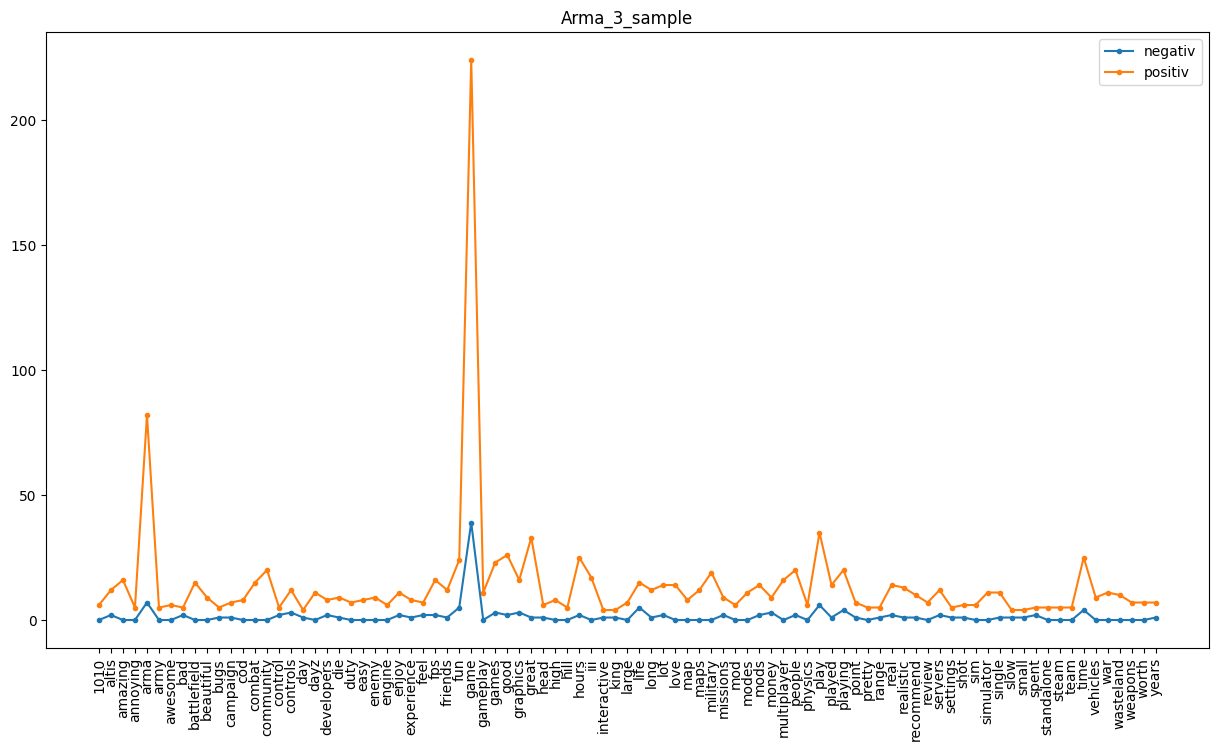

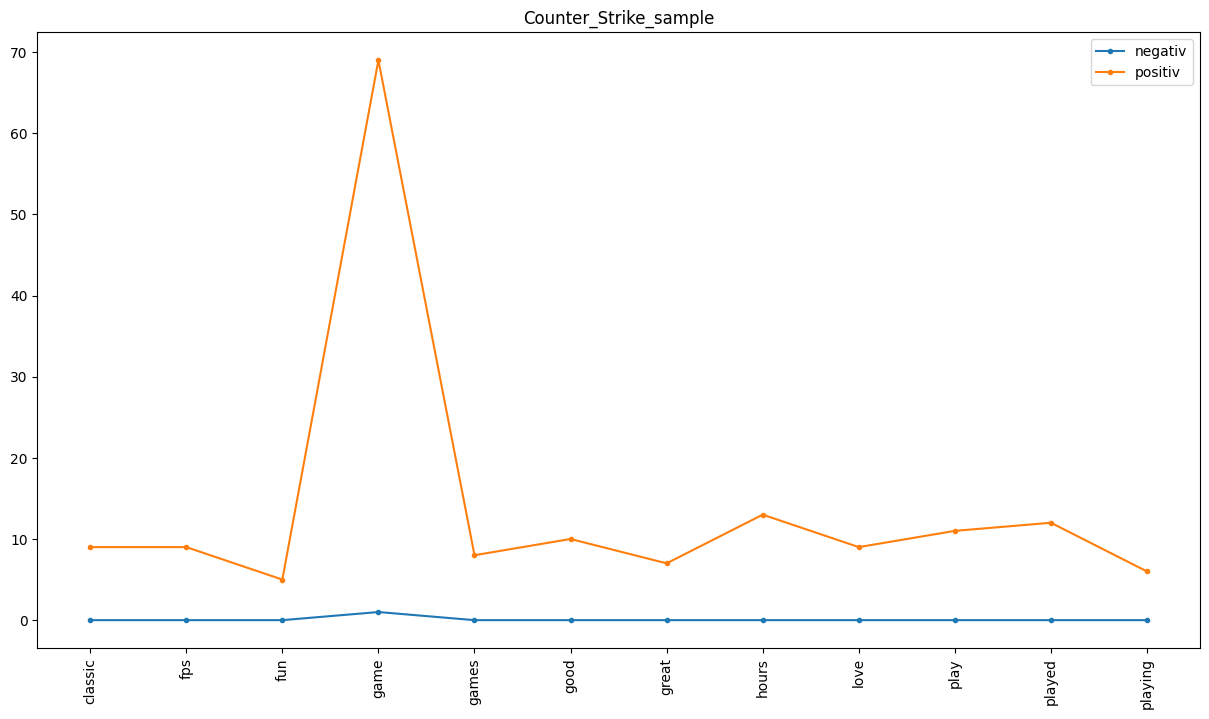

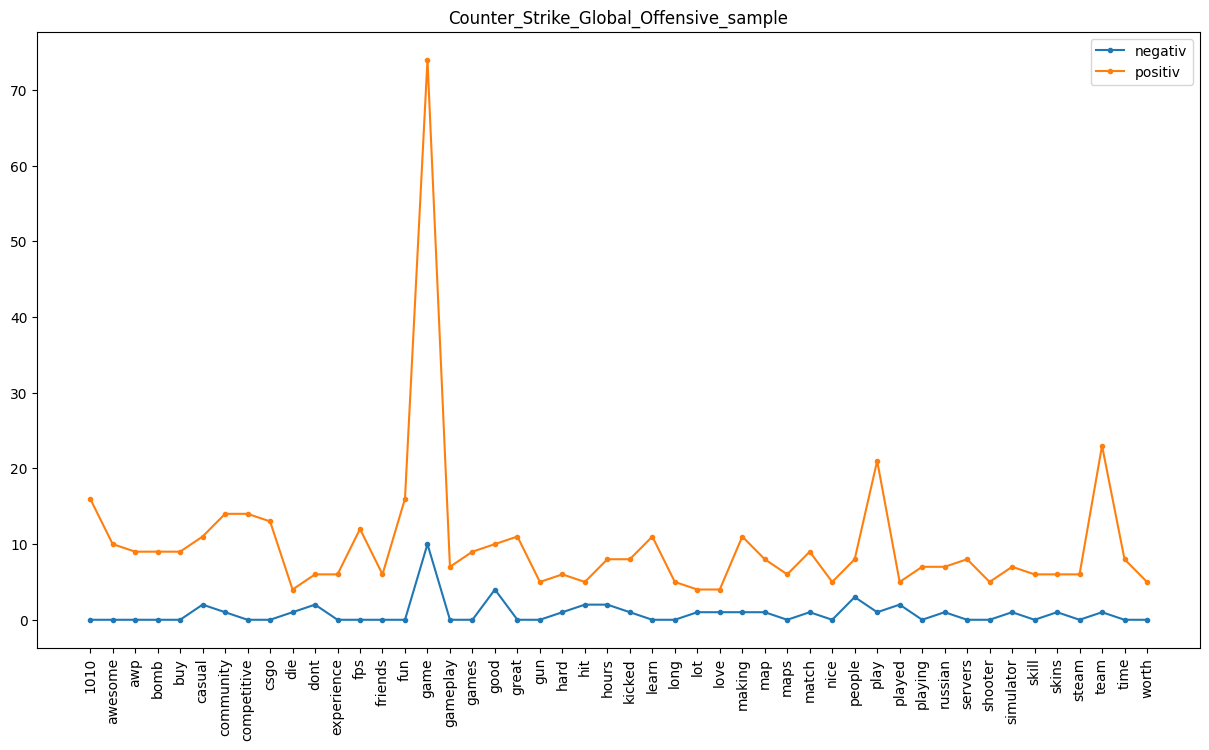

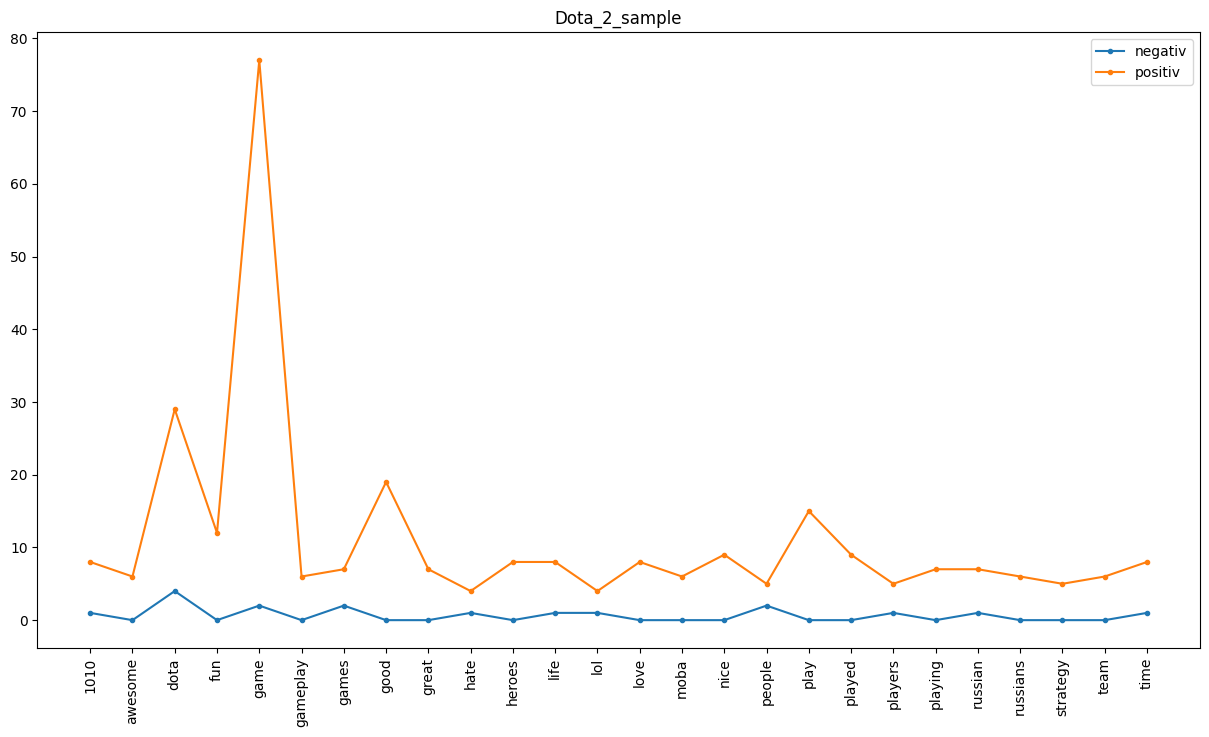

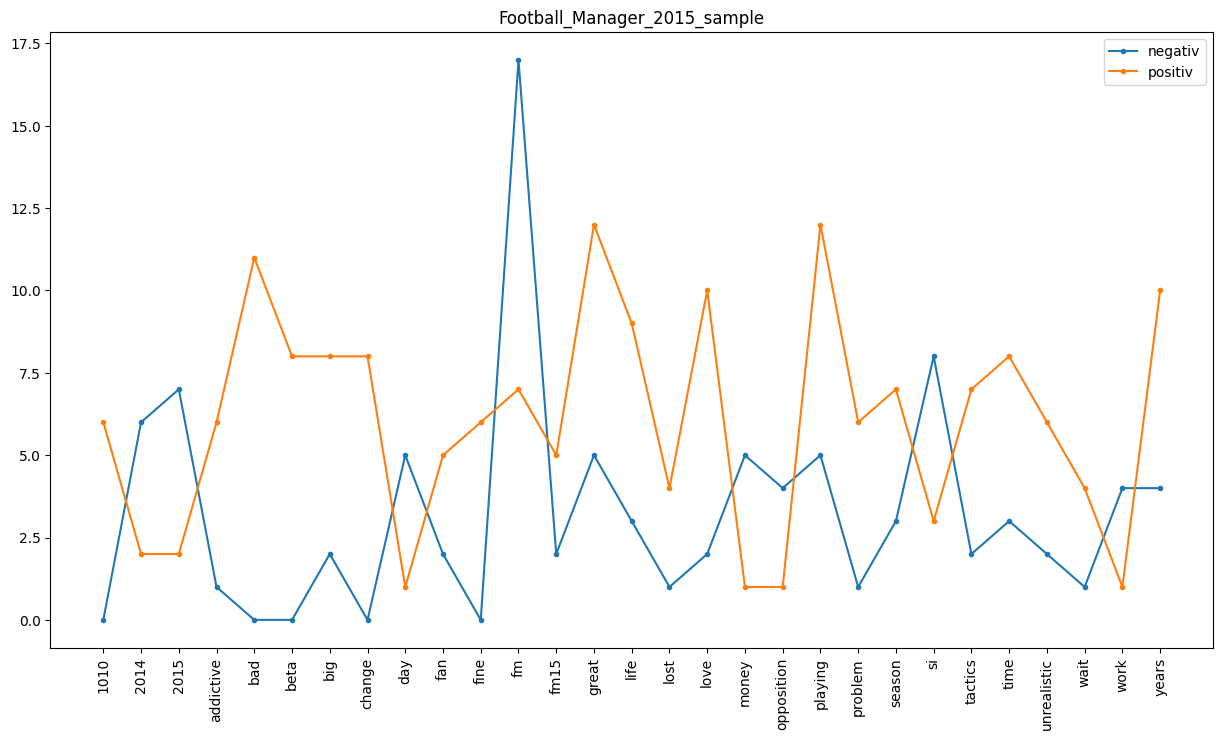

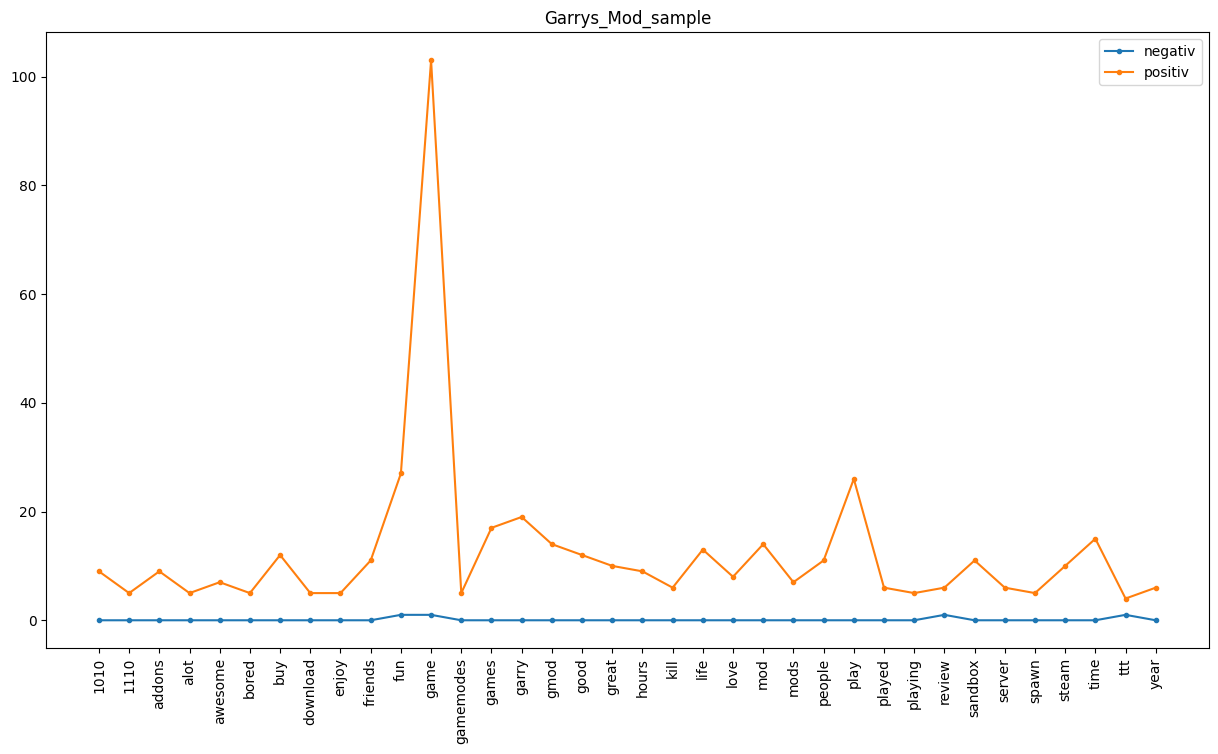

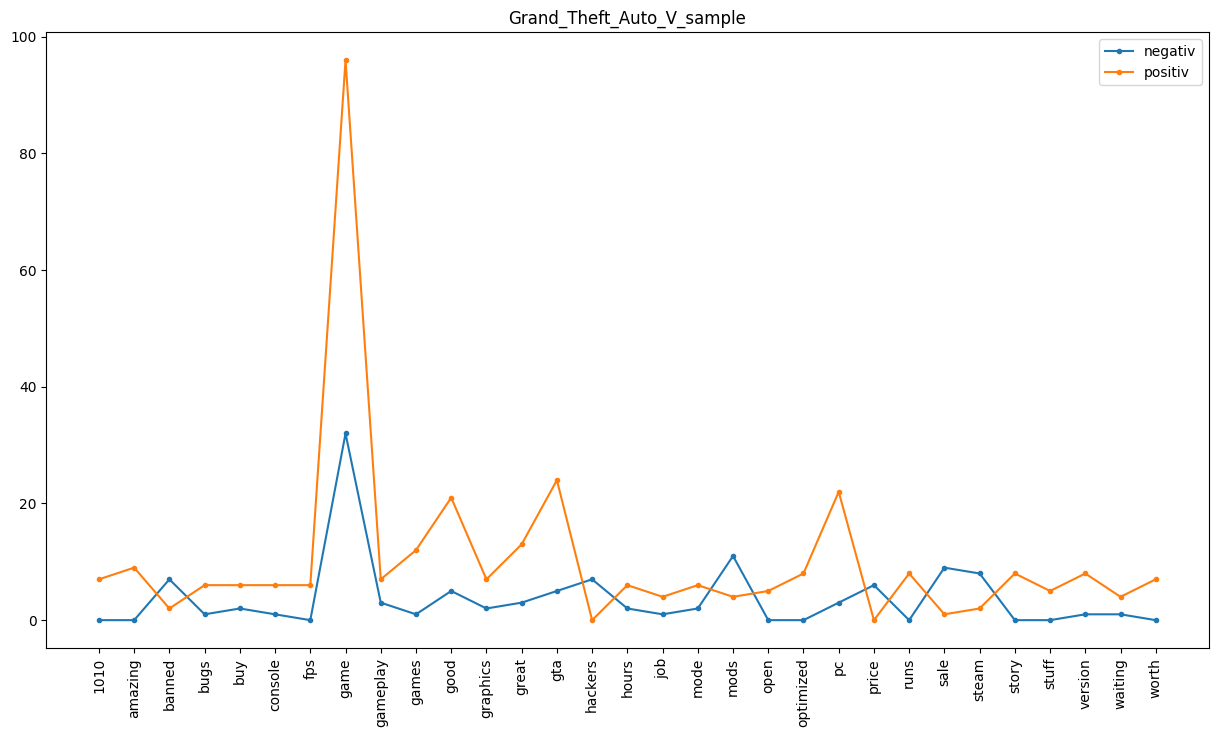

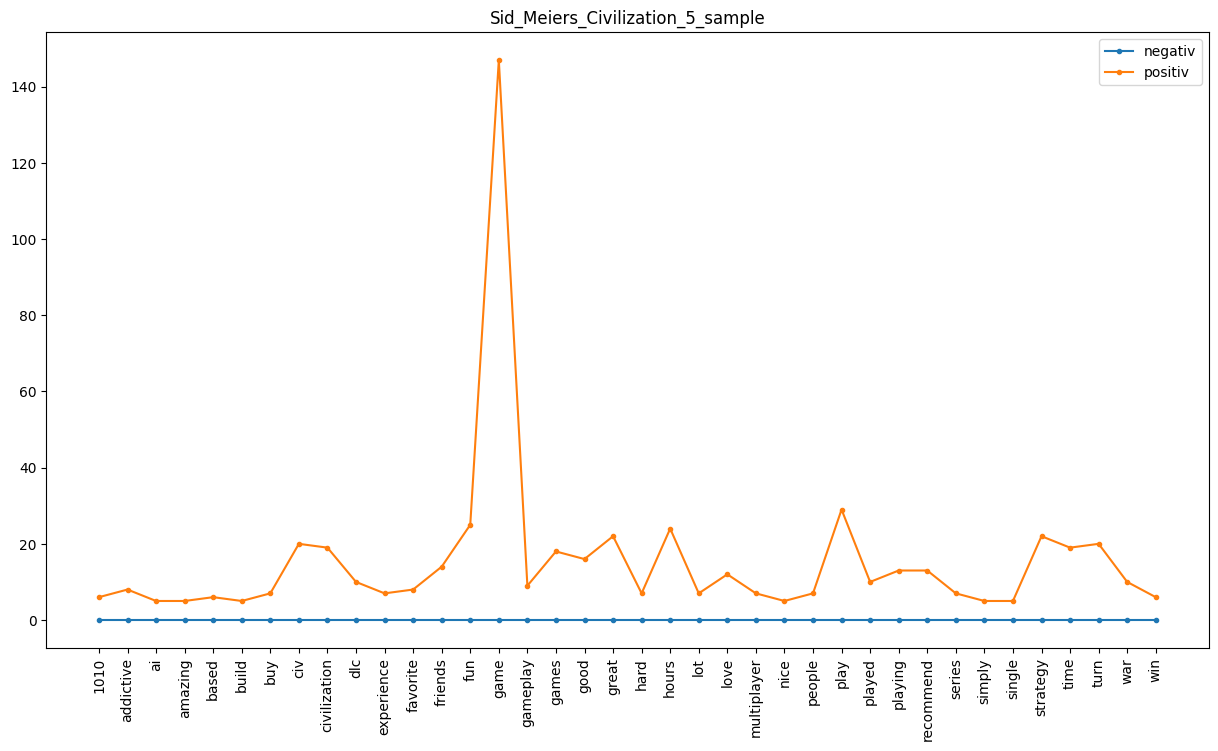

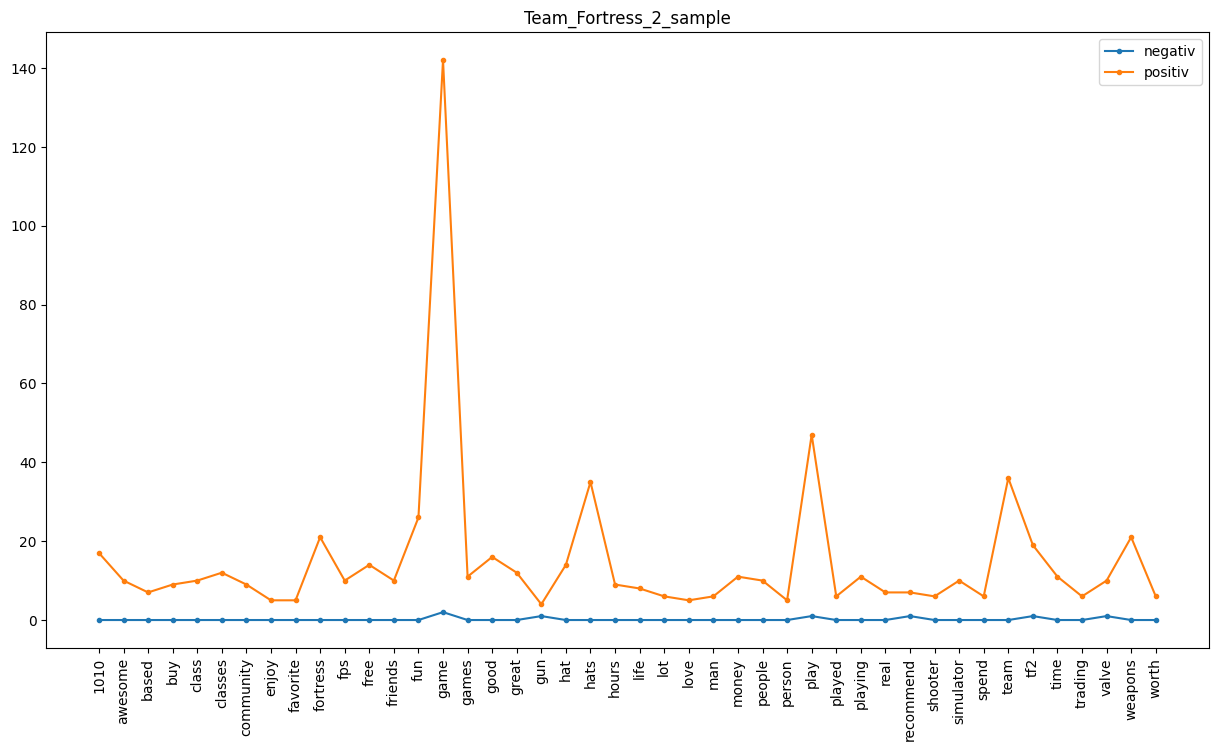

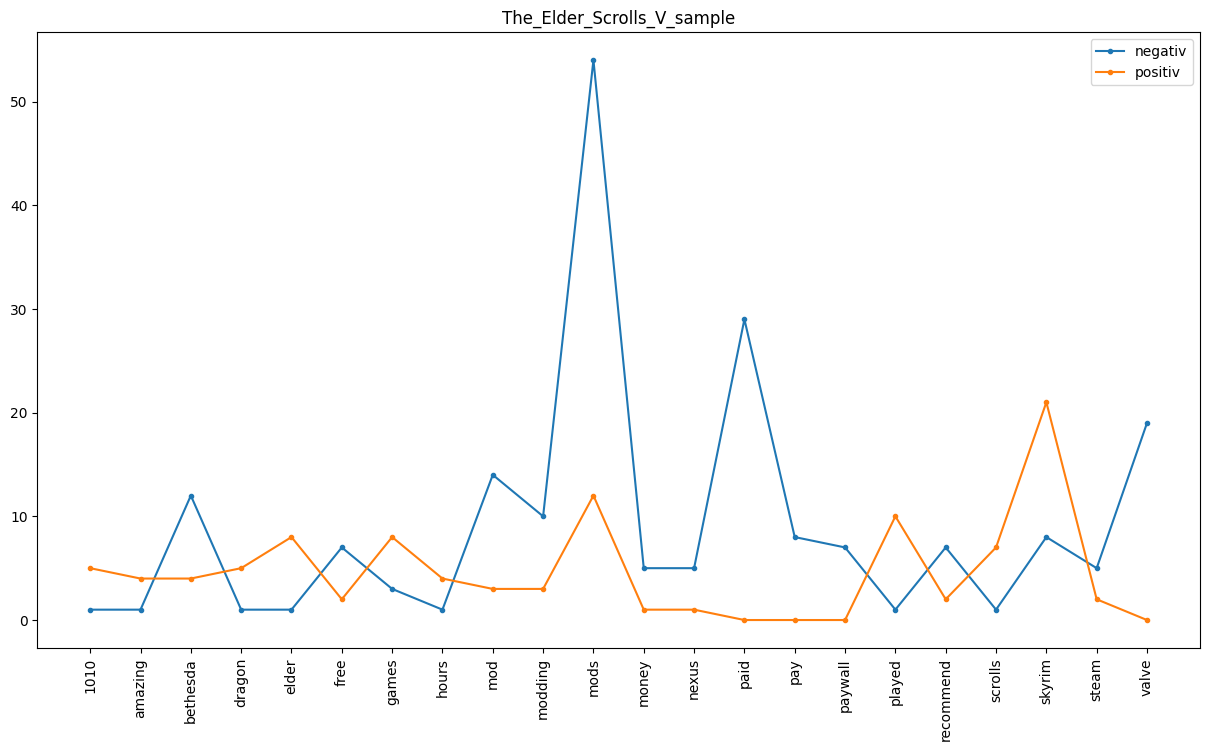

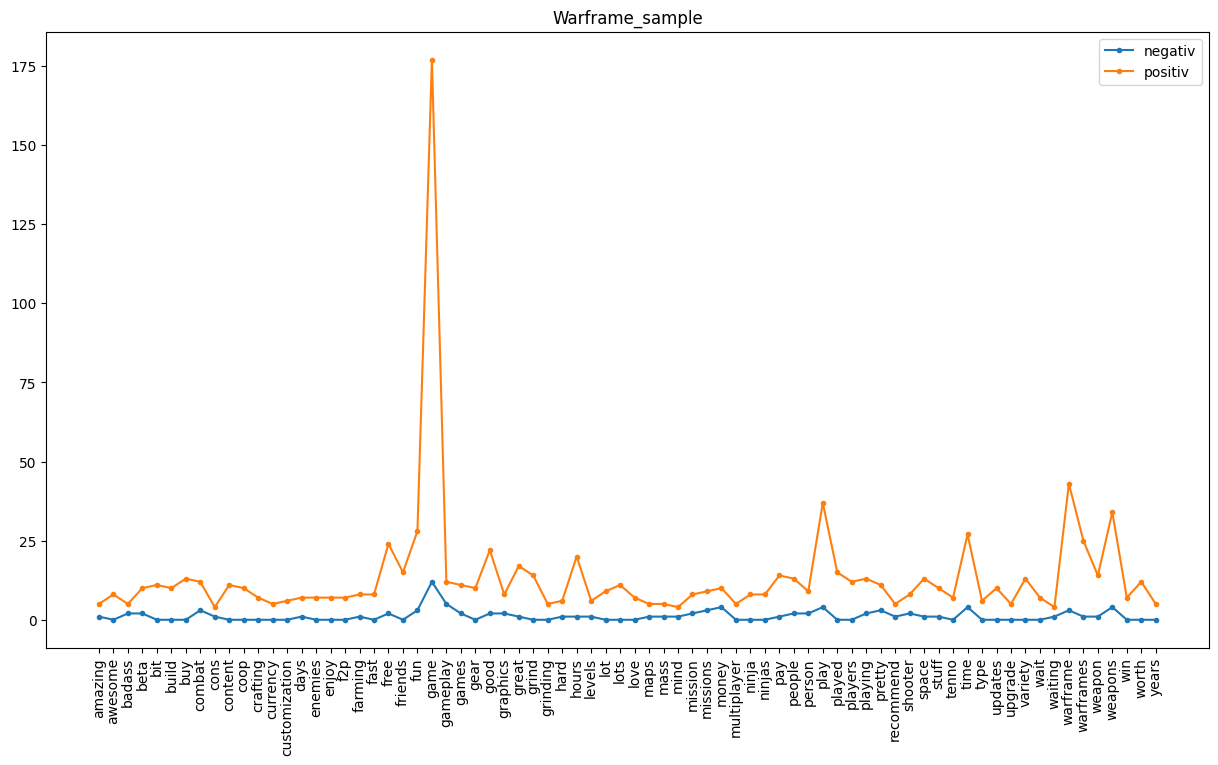

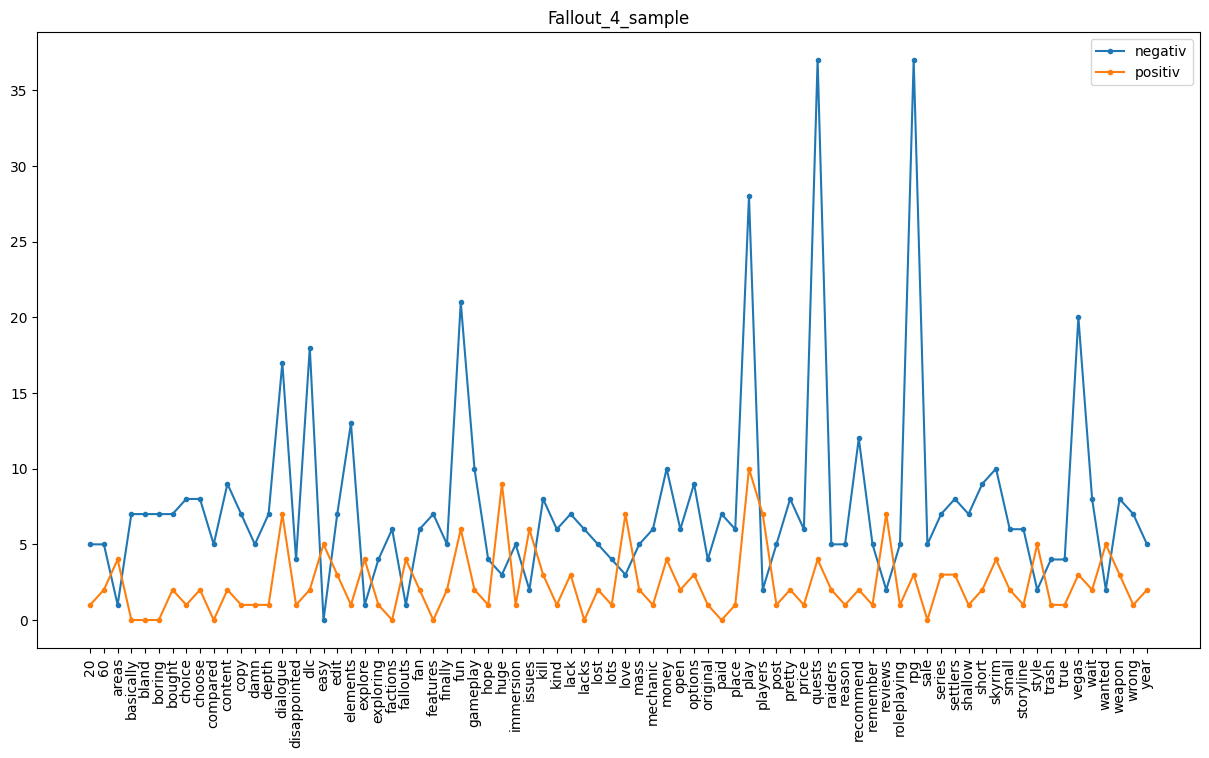

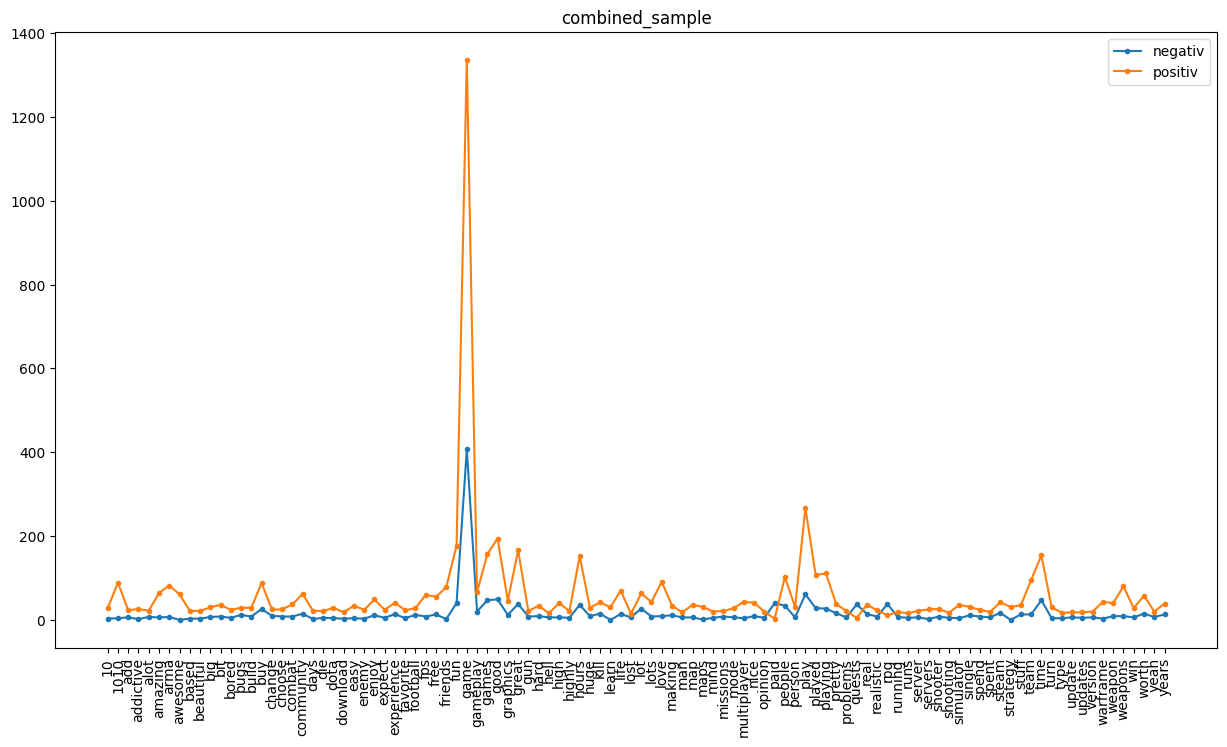

In [4]:
for game in df_samples.keys():
    if game == 'combined':
        # filter more
        visualize_wordcount(df=df_samples[game], word_plot_name=(game + '_sample'), max_df=1.0, min_df=20, ngram_range=(1, 1), thresh_rel_diff=0.4, figsize=(15,8))
    else:
        visualize_wordcount(df=df_samples[game], word_plot_name=(game + '_sample'), max_df=1.0, min_df=5, ngram_range=(1, 1), thresh_rel_diff=0.4, figsize=(15,8))

### Plots for ngram range 1 - 2
#### Notes:
- I choose not to exclude words like 'not' from the stop words list, because we can infer them because we know if the review was positive or negative (e.g. 'fun' in negative reviews --> obviously, the game is NOT fun)
- I choose to include all games from the original dataset, even the ones with almost only positive reviews, to see if there's any interesting data in the plots

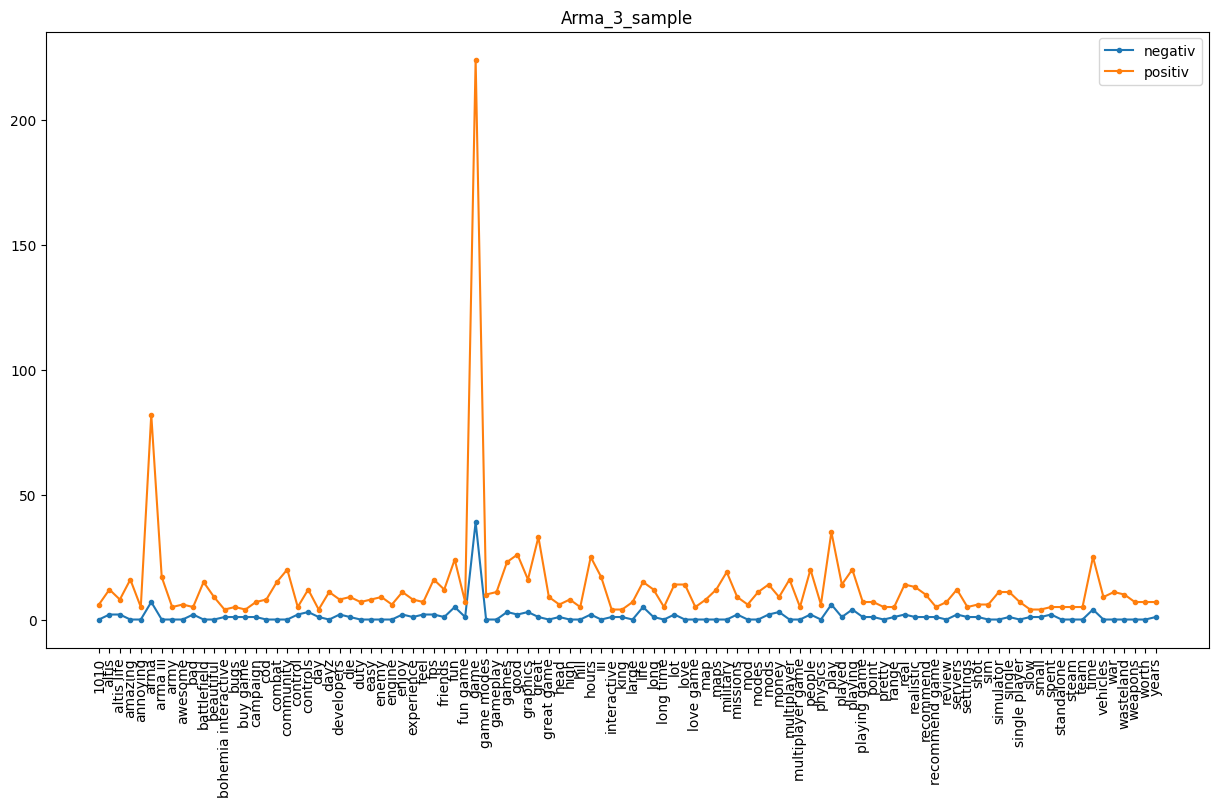

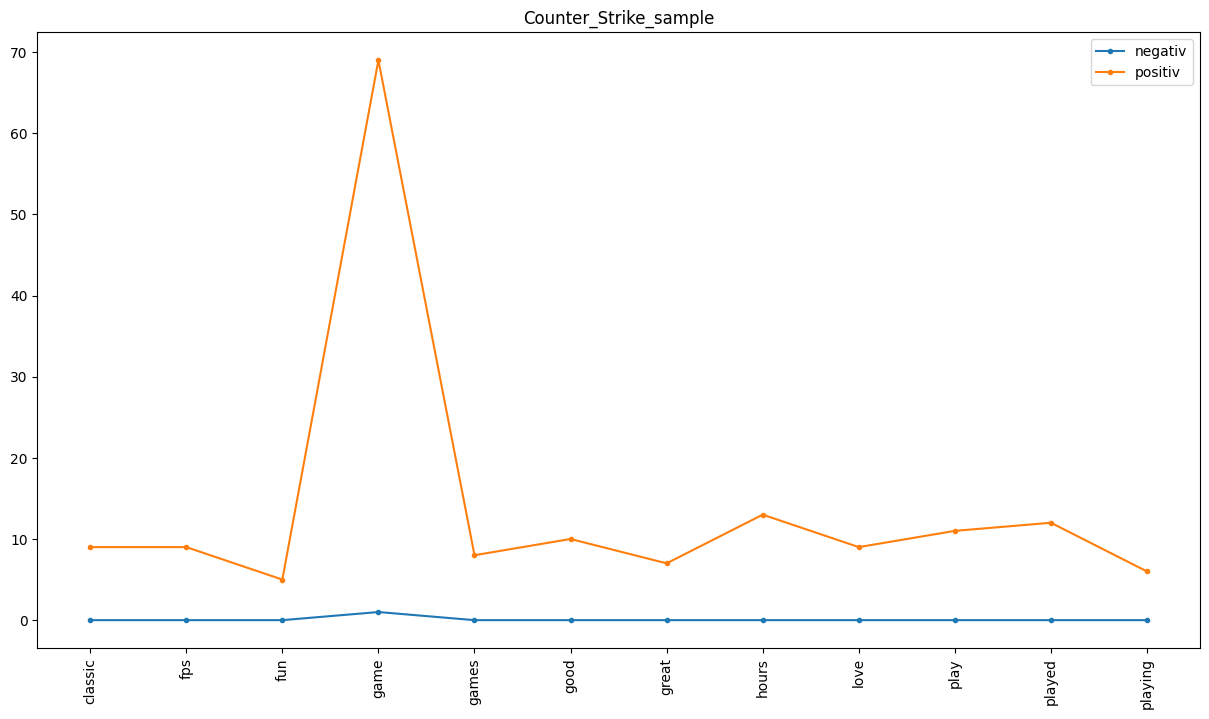

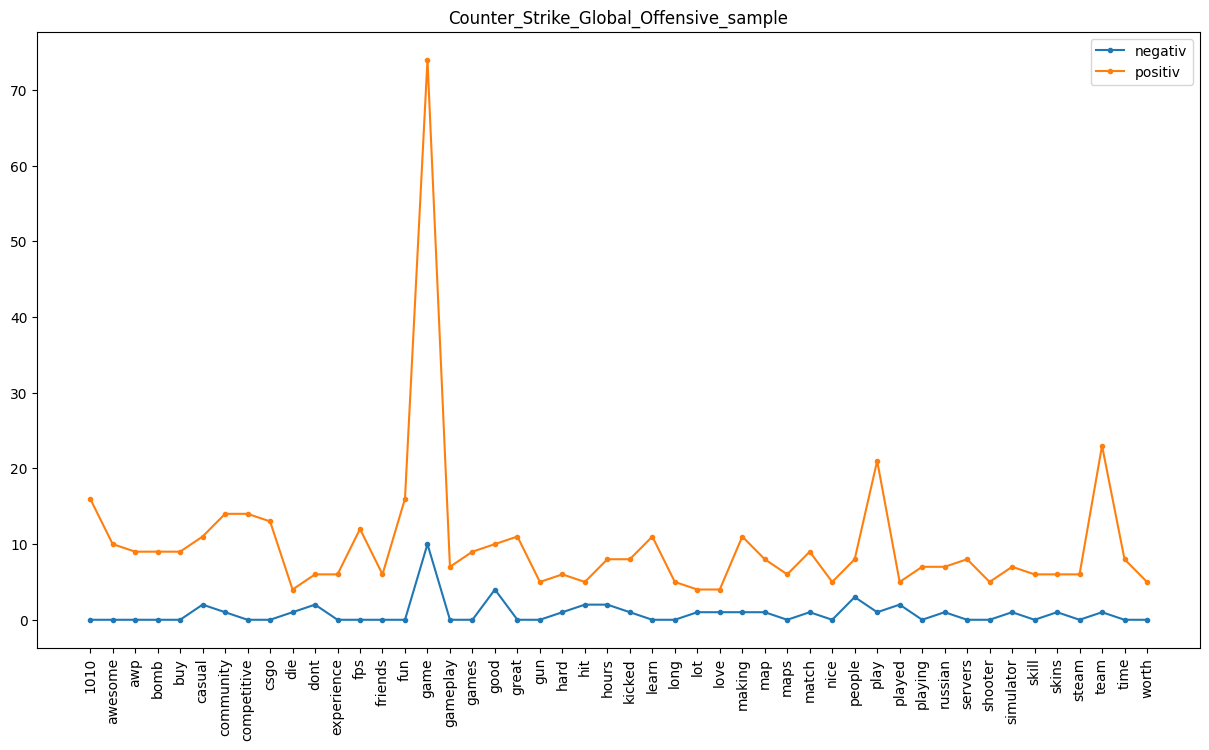

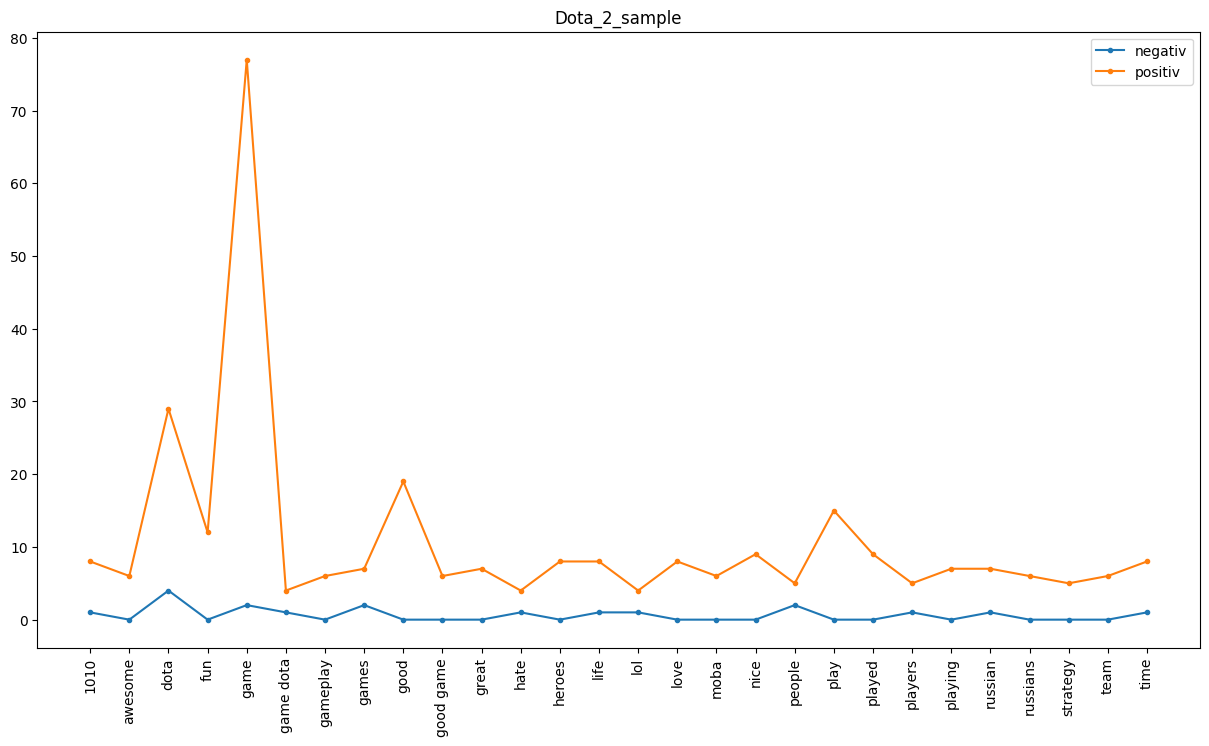

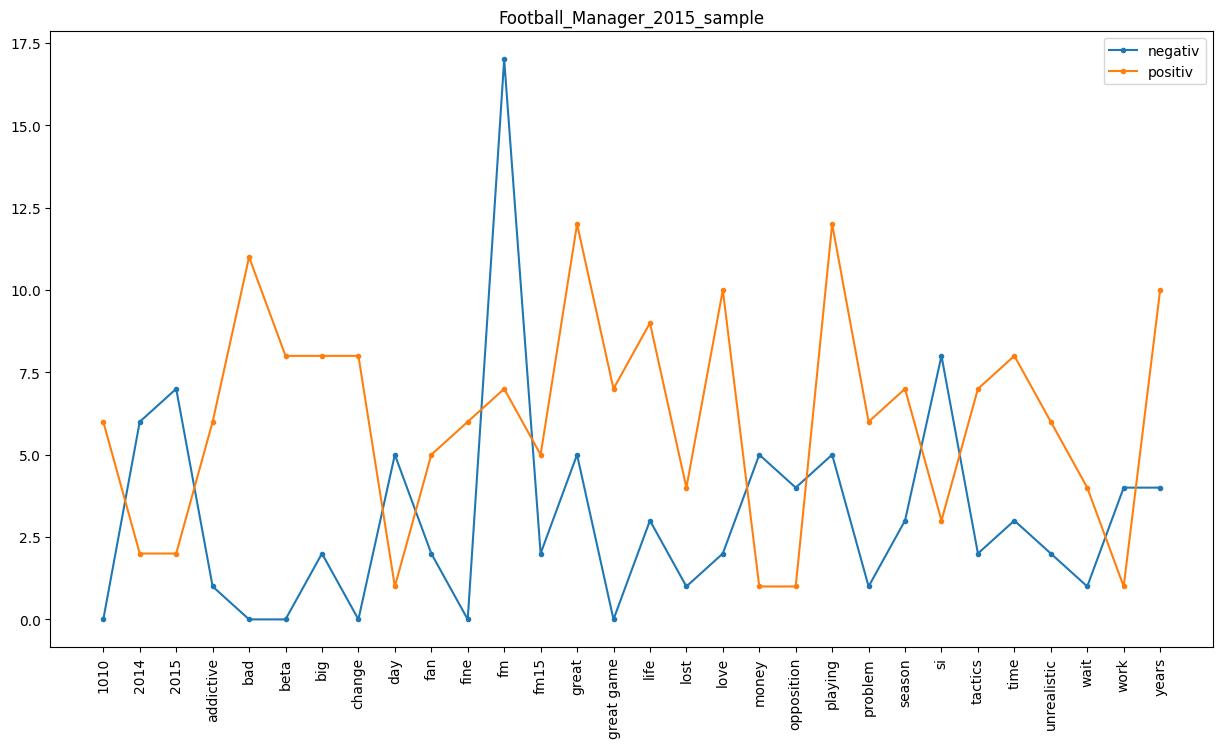

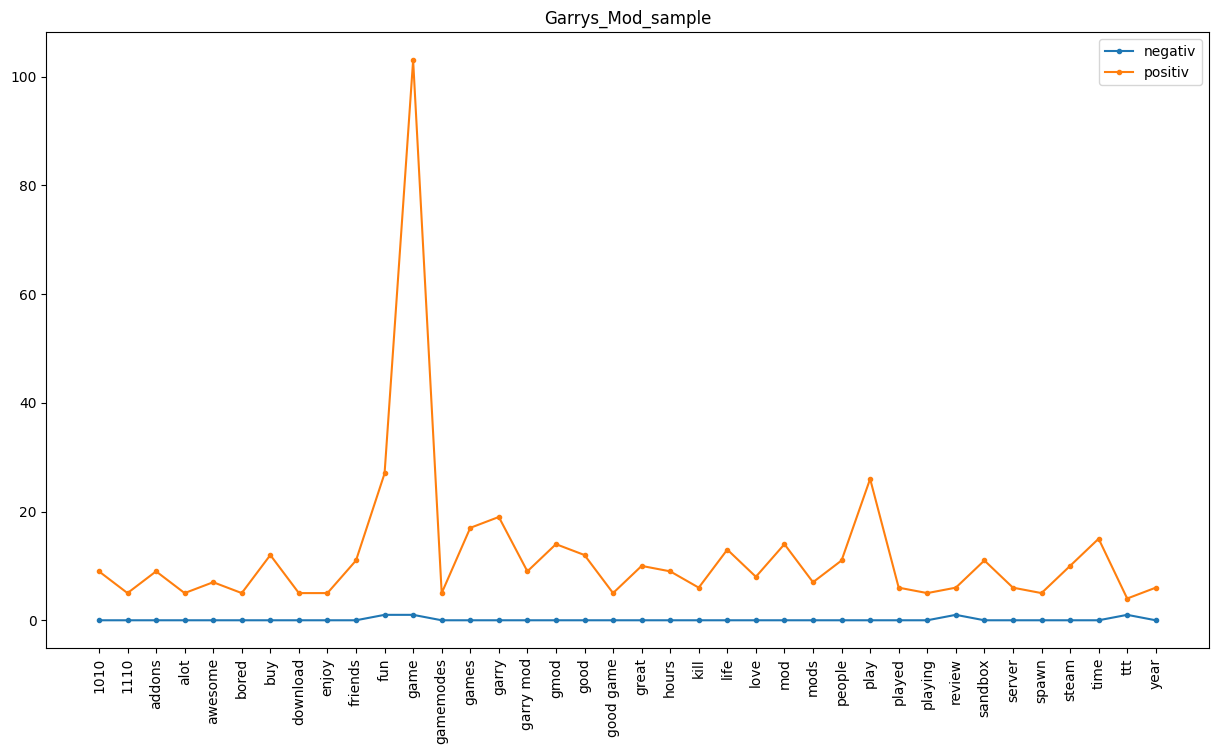

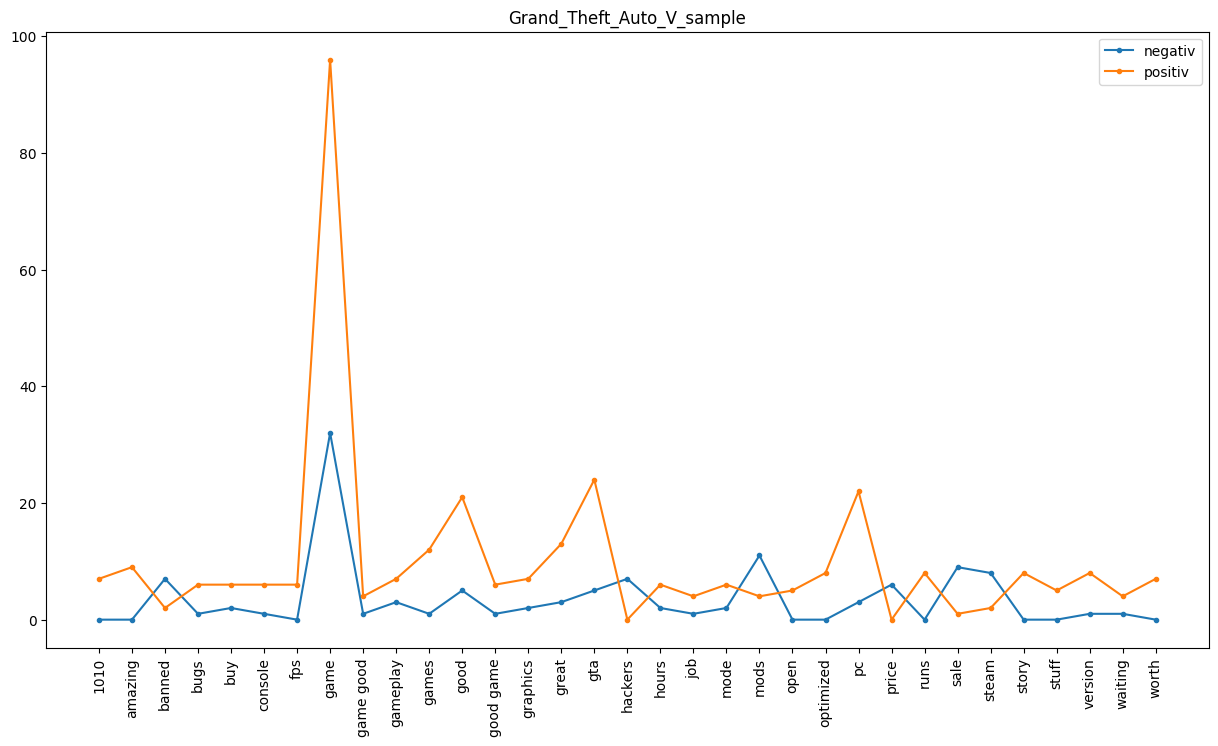

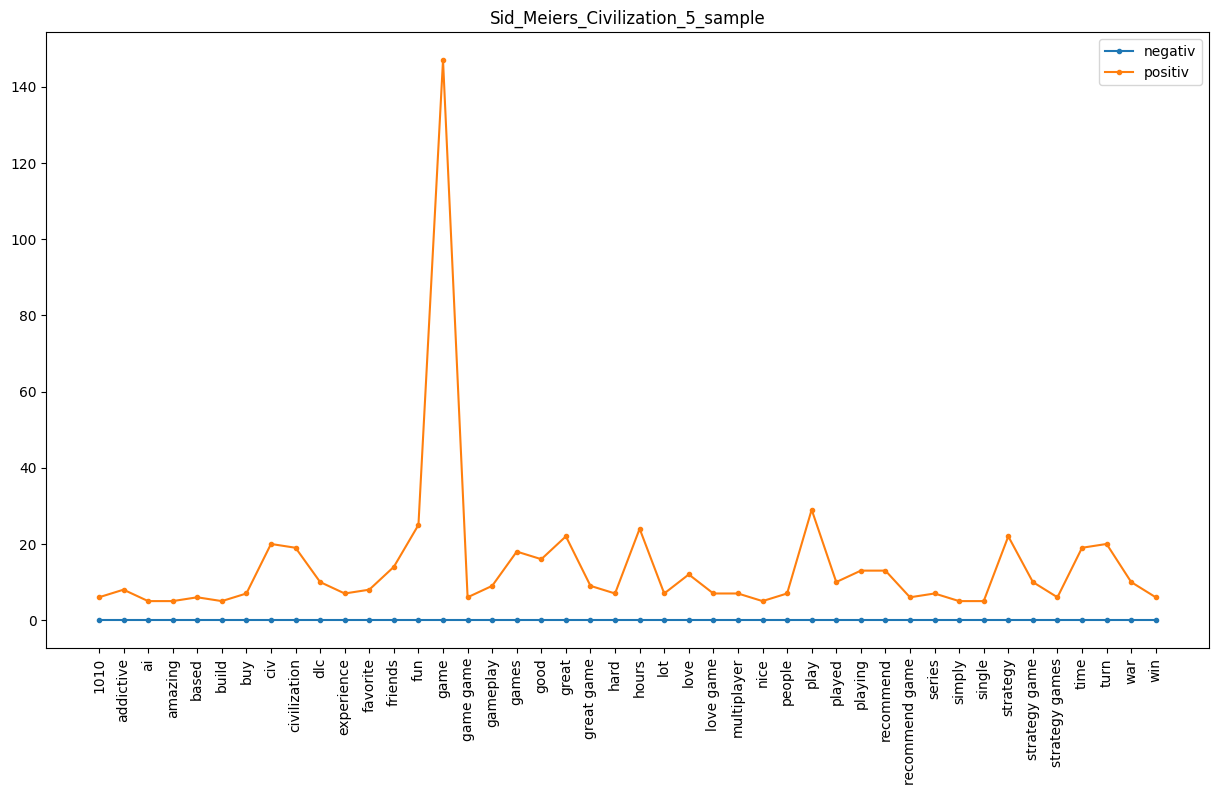

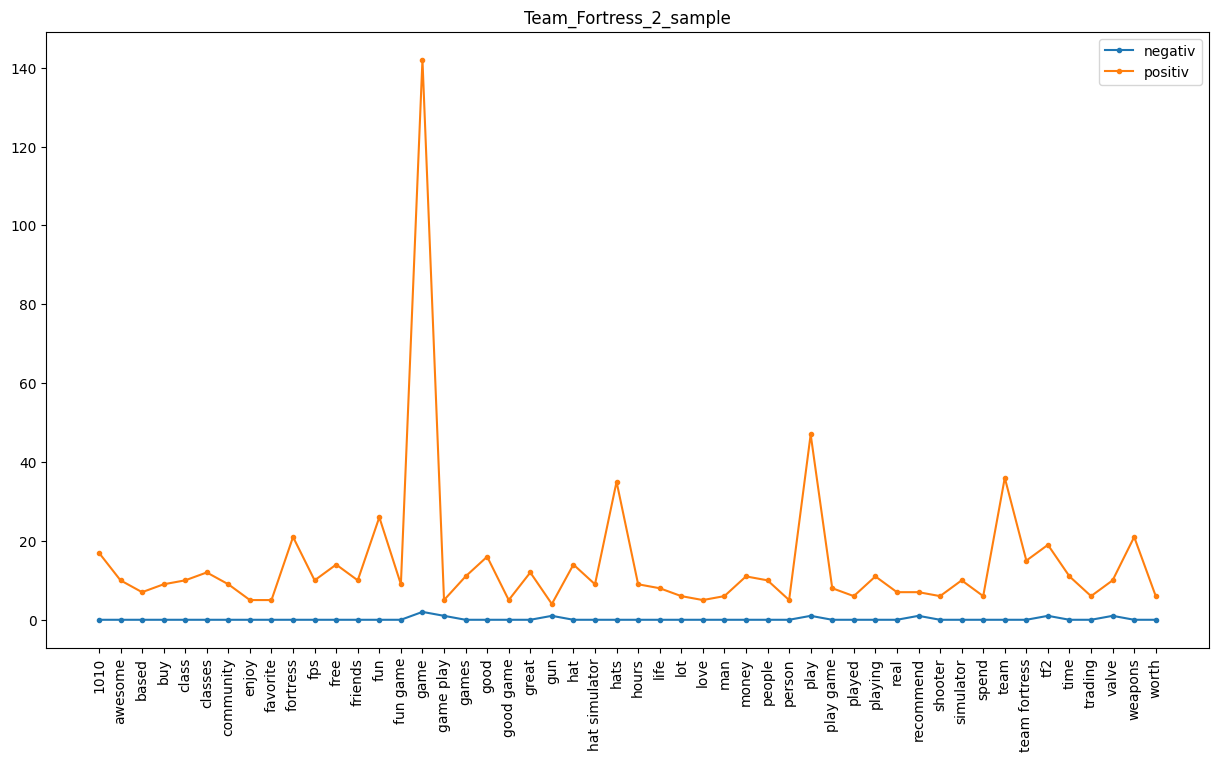

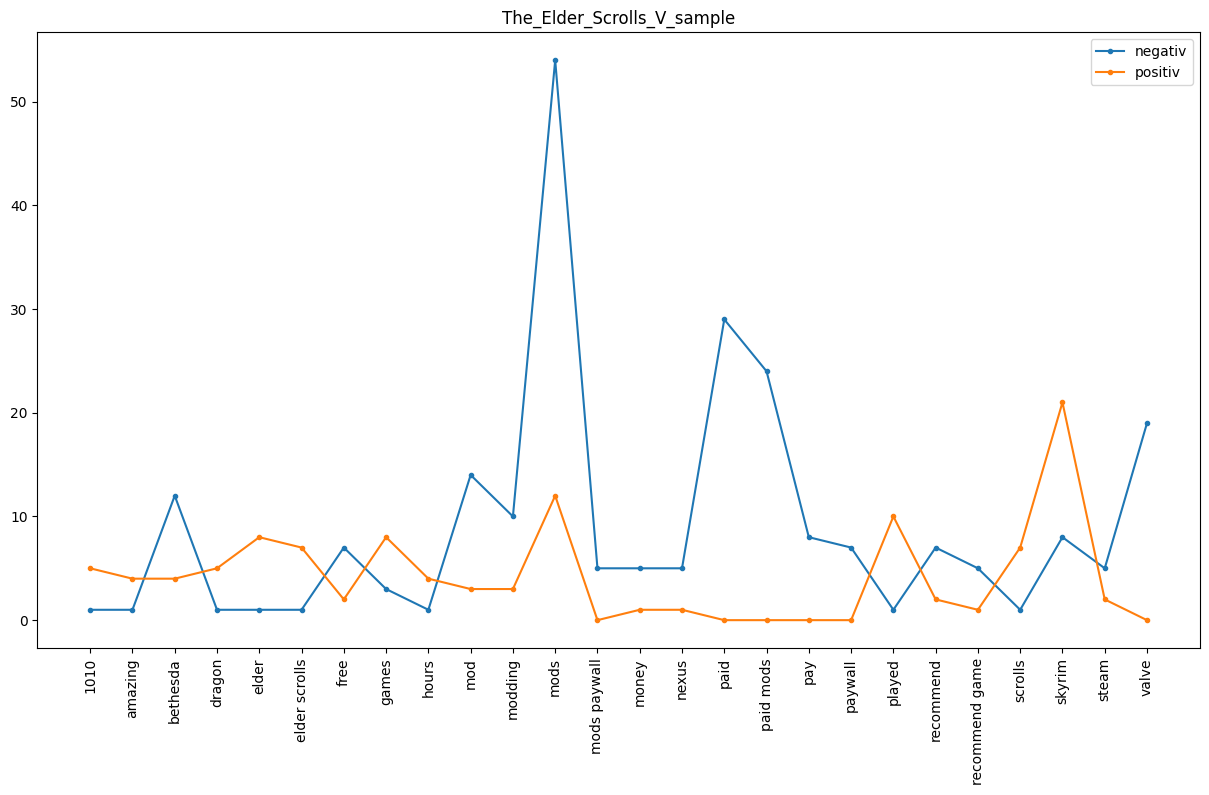

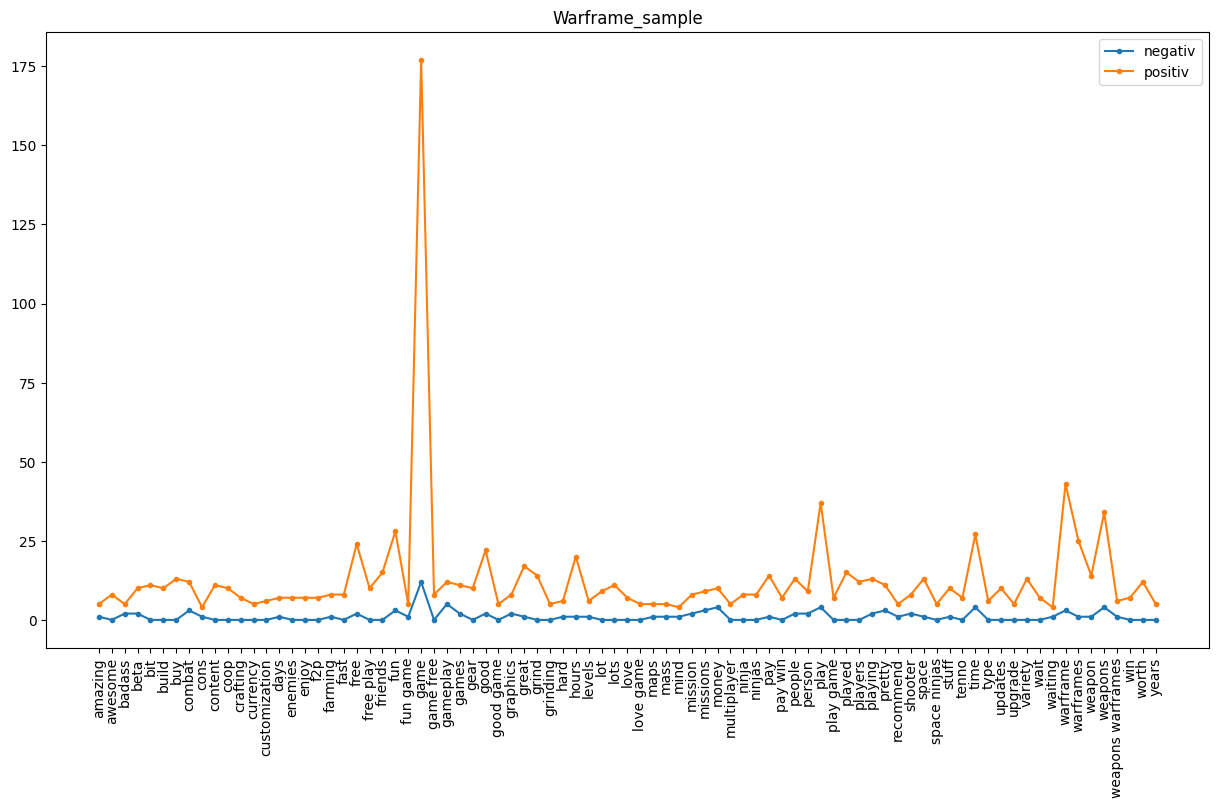

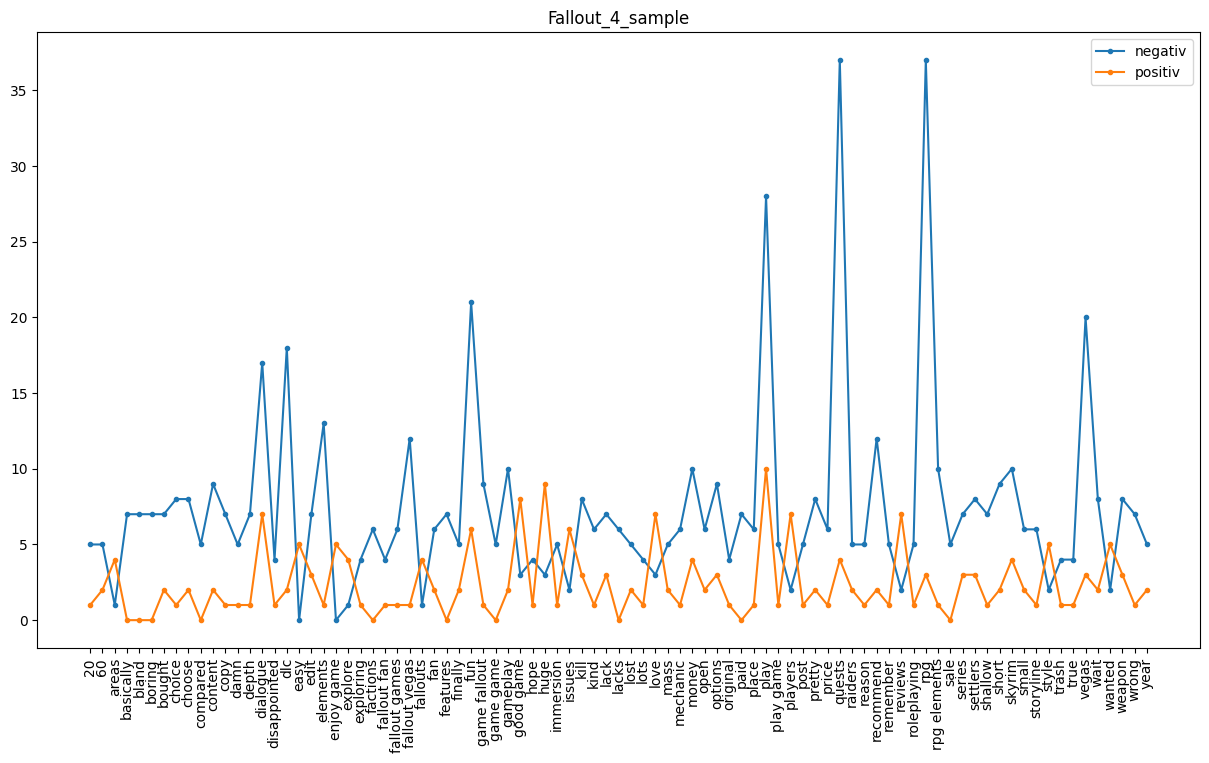

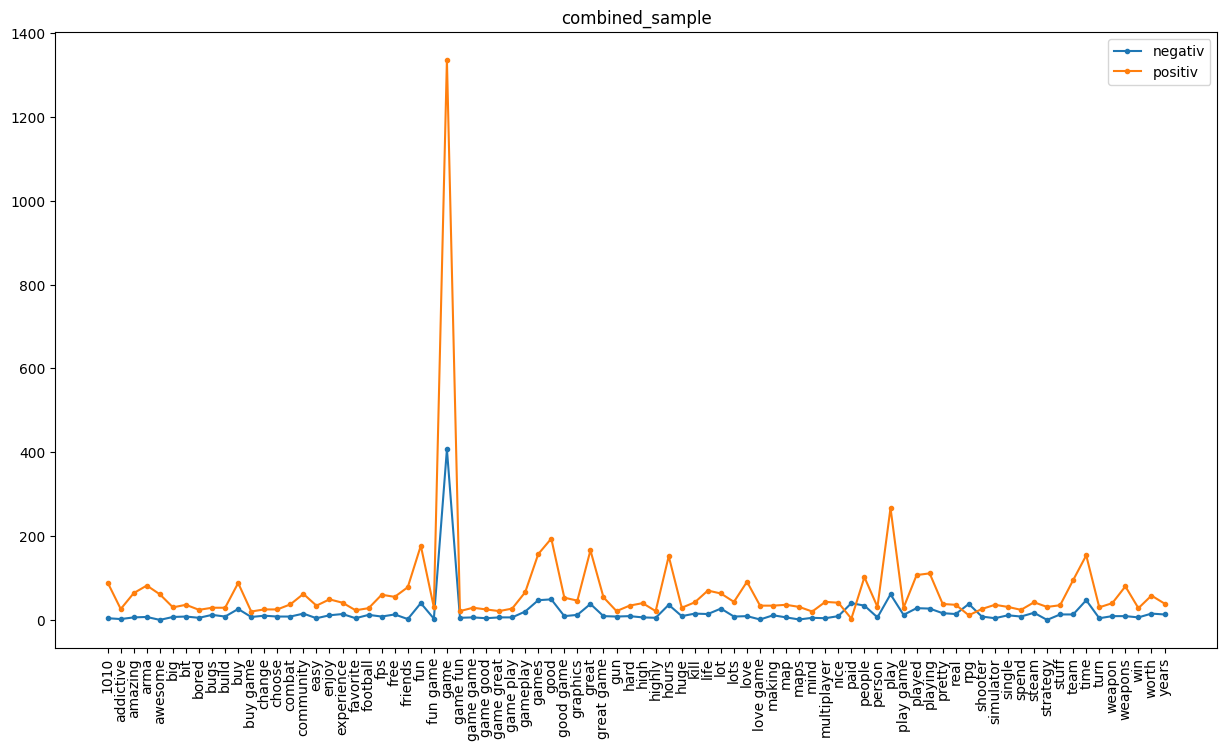

In [5]:
for game in df_samples.keys():
    if game == 'combined':
        # filter more
        visualize_wordcount(df=df_samples[game], word_plot_name=(game + '_sample'), max_df=1.0, min_df=25, ngram_range=(1, 2), thresh_rel_diff=0.4, figsize=(15,8))
    else:
        visualize_wordcount(df=df_samples[game], word_plot_name=(game + '_sample'), max_df=1.0, min_df=5, ngram_range=(1, 2), thresh_rel_diff=0.4, figsize=(15,8))